In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json

In [2]:
df_full = pd.read_pickle("../pickles/cuentalo_json_con_pais_ciudad_limpios.pkl")

# tweets mas retuiteados

In [9]:
grouped_retweets=df_full.groupby('parent_id')

In [4]:
retweeted_ids_with_maxcounts=grouped_retweets['retweet_count'].max()

In [5]:
corte=2500
most_rts=df_full[df_full.id.isin(retweeted_ids_with_maxcounts[retweeted_ids_with_maxcounts>corte].index)].sort_values('retweet_count',ascending=False)
print ("Tweets con mas de ",corte,"retweets:",len(most_rts))
most_rts.full_text=most_rts.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts.parent_full_text=most_rts.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts[['user_followers_count','retweet_count','favorite_count','user_screen_name']]

Tweets con mas de  2500 retweets: 150


,user_followers_count,retweet_count,favorite_count,user_screen_name
tweet_id,,,,
990201907456208896,1148,54705,71796,martolius
991217730601848834,2543,44150,63430,micaserrano23
991464409825505280,2238,33892,34689,viickymonti
990818114995703808,591,22633,32814,rg_vianca
990775116807229440,718,20483,58393,sabri_barra
990779462273953794,1344,17764,63256,cchaconj
990325049893801984,5825,17472,30484,AlejandraTuk
991034153268383751,761,17195,51220,santygom3z
990864702011006977,386,16094,23308,victoriaEacosta


In [6]:
most_rts.to_excel("../intermediate_data/tweets_mas_rt.xls")

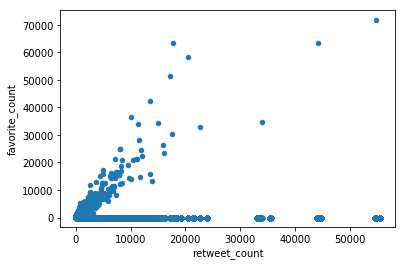

In [7]:
df_full.favorite_count=df_full.fillna(-1).favorite_count.astype(np.int32)
df_full[['favorite_count','retweet_count']].plot.scatter(x='retweet_count',y='favorite_count')

# Barcelona

In [10]:
# rts en barcelona 
rts_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type=='retweet')].copy()
rts_bcn.full_text = rts_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
rts_bcn.parent_full_text=rts_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#rts_bcn.to_excel("retweets_en_barcelona.xlsx")

In [11]:
# tweets originales de usuarios en barcelona
tweets_de_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type!='retweet')].copy()
tweets_de_bcn.full_text = tweets_de_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
tweets_de_bcn.parent_full_text=tweets_de_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#tweets_de_bcn.to_excel("tweets_de_barcelona.xlsx")

In [12]:
# ids de los tweets originales de Barcelona, a ver cuales tenemos en la DB
ids_retweeteds_from_barcelona = df_full[df_full.parent_ciudad_clean=='Barcelona'][['id','parent_id']].groupby('parent_id').count().sort_values(by='id',ascending=False).index.values

In [13]:
df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_favorite_count,parent_full_text,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_quote_count,parent_retweet_count,parent_time_zone,parent_user_created_at,parent_user_followers_count,parent_user_id,parent_user_name,parent_user_screen_name,parent_user_statuses_count,place,quote_count,retweet_count,time_zone,tweet_type,user_created_at,user_followers_count,user_id,user_name,user_screen_name,user_statuses_count,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
989943909315940353,None,2018-04-27 19:06:34,10560,Tengo 32 años y me despierto con miedo cuando ...,989943909315940353,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,4621,Athens,original,2011-05-09 06:51:46,765,295537621,Paula Borja,pau_borja,1912,Barcelona,España,9.000,NaN,NaN,NaN
990160880682889217,None,2018-04-28 09:28:44,5178,Sabéis que tienen en común todos los tíos que ...,990160880682889217,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2367,None,original,2018-03-23 23:11:27,2401,977321957912993792,Aka bxrgerqueen,_chocoqueen,2954,Barcelona,España,4.000,NaN,NaN,NaN
989864640887902209,None,2018-04-27 13:51:35,5360,"Mi madre me explicaba que en su ciudad, cuando...",989864640887902209,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2323,Pacific Time (US & Canada),original,2014-01-27 11:14:49,17299,2313471692,Ana Bolena,mantonieta1536,52470,Barcelona,España,9.000,NaN,NaN,NaN
989952859176349696,None,2018-04-27 19:42:08,5224,Todos los hombres hemos cometido algún tipo de...,989952859176349696,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1732,Greenland,original,2009-12-03 13:05:11,59395,94324983,Fonsi Loaiza,FonsiLoaiza,79054,Barcelona,España,19.500,NaN,NaN,NaN
990350573215059968,None,2018-04-28 22:02:31,5143,Me escribís algunas angustiadas porque no que...,990350573215059968,-999.0,Málaga - Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1429,Greenland,original,2009-08-19 23:53:57,26918,67165437,Ana I.Bernal-Triviño,anaisbernal,121592,Barcelona,España,19.500,NaN,NaN,NaN
991622597933780992,None,2018-05-02 10:17:05,951,El retrógrado Alfonso Ussía recibe hoy la meda...,991622597933780992,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,953,Greenland,original,2009-12-03 13:05:11,59732,94324983,Fonsi Loaiza,FonsiLoaiza,79149,Barcelona,España,19.500,NaN,NaN,NaN
989983536777236482,None,2018-04-27 21:44:02,2126,¿Y cuántas veces habéis acabado de follar solo...,989983536777236482,-999.0,Barcelona.,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,938,Pacific Time (US & Canada),original,2016-06-18 18:10:41,3173,744230870937141248,Judit.,femilinda_,30315,Barcelona,España,9.000,NaN,NaN,NaN
990285456494522368,None,2018-04-28 17:43:46,1681,"18 años, volvía de fiesta, un hombre la llama ...",990285456494522368,-999.0,"Barcelona, España",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,877,None,original,2017-08-29 12:37:04,13,902510409269305348,LV,lauravivesf,6,Barcelona,España,12.000,NaN,NaN,NaN
990217327609294849,None,2018-04-28 13:13:02,1260,Es sorprendente que muchas que leemos #Cuental...,990217327609294849,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,693,Madrid,original,2011-10-29 14:57:48,3050,400766668,Her,_hherol,50559,Barcelona,España,4.000,NaN,NaN,NaN


In [14]:
df_bcn = df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

In [15]:
df_bcn.retweet_count.sum()

30643